# **GROUP_MEMBER_NAME:**

**Dhara patel**

**Dhruv suthar**

### **IMPORT LIBRARIES**

In [ ]:
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing (1).csv


### **DATA COLLECTION**:

In [ ]:
data = pd.read_csv("USA_Housing.csv")

In [ ]:
data.shape

(5000, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
remove_decimal = lambda a: [round(x,2) for x in a]

In [ ]:
data["Price"] = remove_decimal(data.Price)

In [ ]:
data.drop("Address", axis = 1, inplace = True)

In [ ]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1059033.56
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1505890.91
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1058987.99
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1260616.81
4,59982.197226,5.040555,7.839388,4.23,26354.109472,630943.49


In [ ]:
data = data.sample(frac = 1).reset_index().drop("index",axis=1) #sampling the data

The USA housing dataset includes data on many housing characteristics, like the number of beds, total square footage, price, etc., To investigate the relationships between these various traits, use the **sns.pairplot()** function.



### **For example:**


scatterplots of the quantity of bedrooms versus the cost of the home, the amount of square footage versus the cost of the home, and so forth. The histogram of each variable will be displayed on the plot's main diagonal.


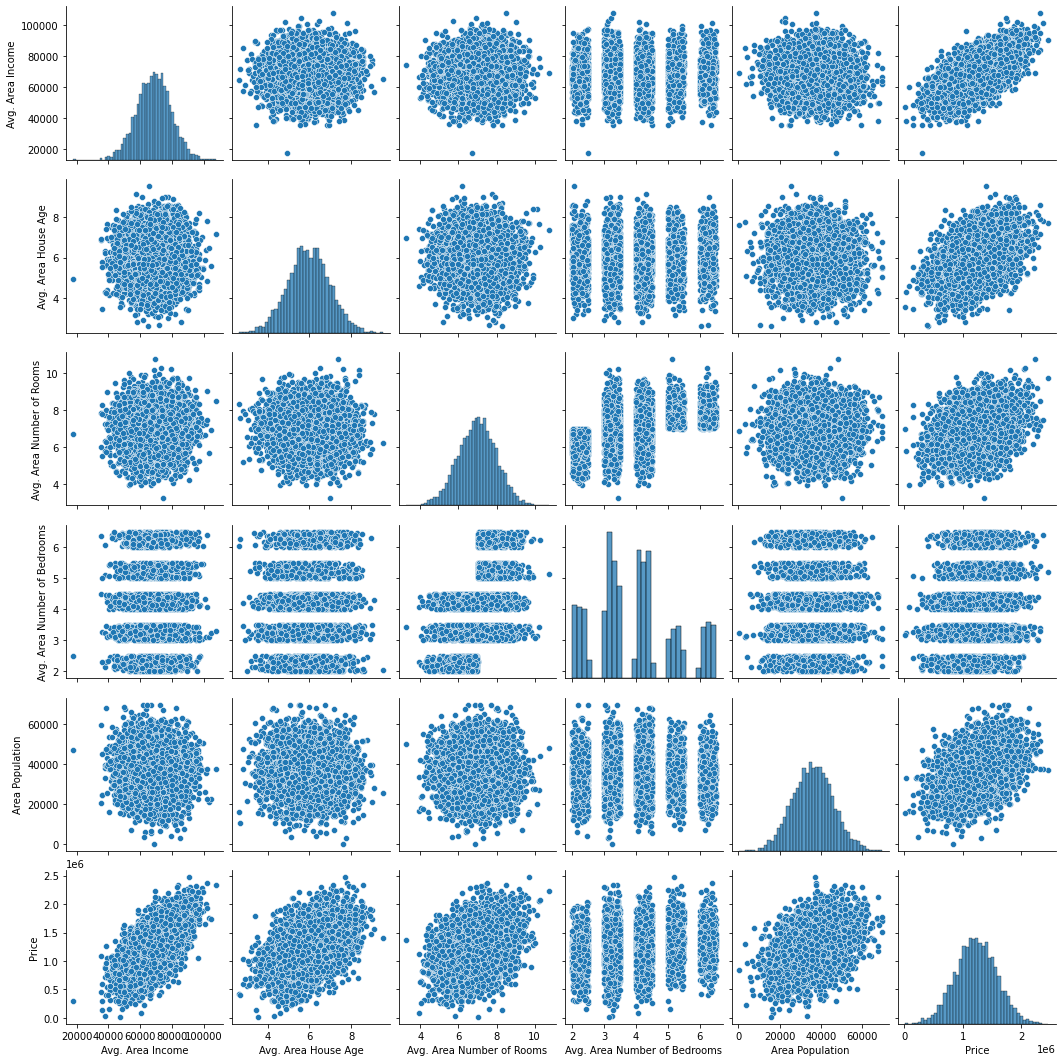

In [ ]:
sns.pairplot(data)

In [ ]:
columns = data.columns

## **Cumulative Distribution Plot**:

The distribution of a variable in a dataset can be shown using cumulative distribution plots, which can also be used to locate important summary statistics like the median, quartiles, and range of the data. They can also be used to contrast how a variable is distributed among several dataset subsets.

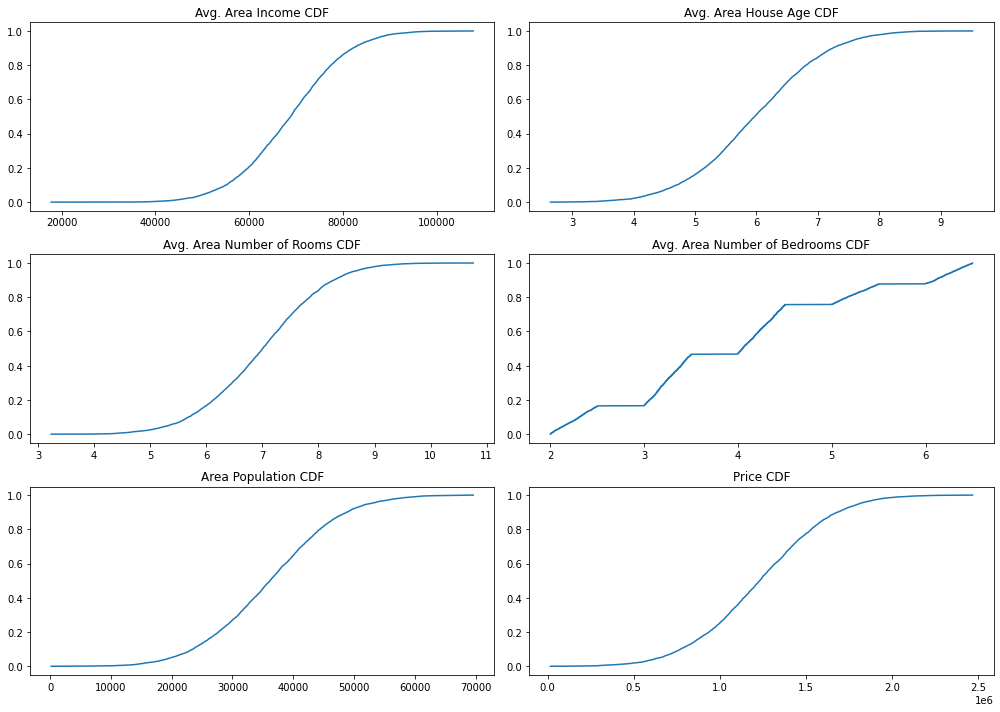

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(321)
ecdf_1 = ECDF(data[columns[0]])
plt.title(columns[0] + " CDF")
plt.plot(ecdf_1.x, ecdf_1.y)
plt.subplot(322)
ecdf_2 = ECDF(data[columns[1]])
plt.title(columns[1] + " CDF")
plt.plot(ecdf_2.x, ecdf_2.y)
plt.subplot(323)
ecdf_3 = ECDF(data[columns[2]])
plt.title(columns[2] + " CDF")
plt.plot(ecdf_3.x, ecdf_3.y)
plt.subplot(324)
ecdf_4 = ECDF(data[columns[3]])
plt.title(columns[3] + " CDF")
plt.plot(ecdf_4.x, ecdf_4.y)
plt.subplot(325)
ecdf_5 = ECDF(data[columns[4]])
plt.title(columns[4] + " CDF")
plt.plot(ecdf_5.x, ecdf_5.y)
plt.subplot(326)
ecdf_6 = ECDF(data[columns[5]])
plt.title(columns[5] + " CDF")
plt.plot(ecdf_6.x, ecdf_6.y)
plt.tight_layout()

## **Outlier Analysis**:

Finding and analysing data points in a dataset that significantly differ from other data points is known as outlier analysis. Measurement errors, data processing errors, or uncommon occurrences in the data can all lead to outliers. Outliers must be properly identified and handled because they can significantly affect the outcomes of data analysis.

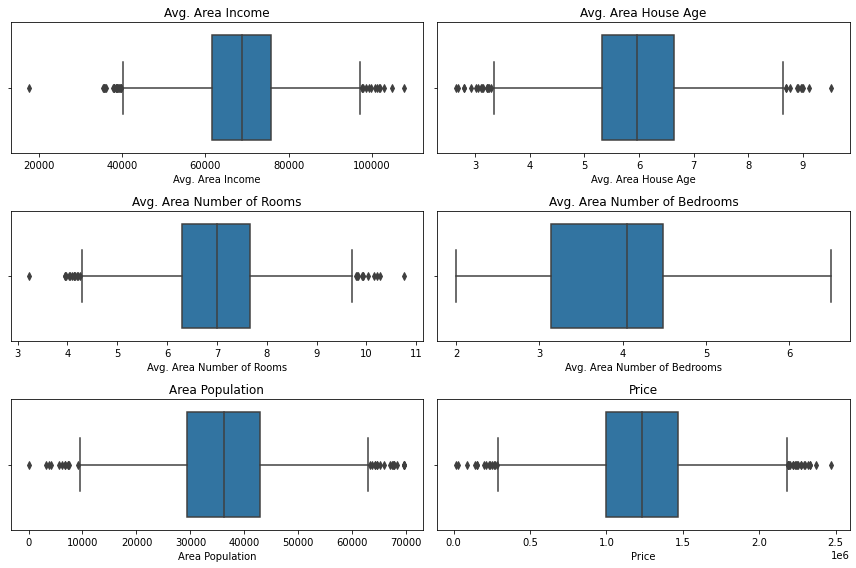

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(12,8))
axis = [axes_row for axes in ax for axes_row in axes]

for i, j in enumerate(data.columns):
    graph = sns.boxplot(x = data[j], ax = axis[i])
    graph.set_title(j)
    plt.tight_layout()

Here, we can observe that various probable outliers exist in our data, with the exception of the average area number of bedrooms. As a result, before drawing any conclusions, we will first look at these high results and then determine whether to ignore them or include them in our model.

In [ ]:
data.describe(percentiles = [0.001,0.01, 0.1, 0.25, 0.50, 0.75, 0.95, 0.99])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
0.1%,36100.307113,3.004635,4.049299,2.000000,6248.234809,1.520713e+05
1%,43792.673024,3.648537,4.620750,2.020000,13983.282591,4.049730e+05
10%,55047.633980,4.697755,5.681951,2.310000,23502.845262,7.720318e+05
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06


## **Check outliners**:

Finding outliers in a dataset is a crucial step in data analysis since it might reveal probable errors or unique findings that could require more research.

## **Remove outliners**:

After removing the outliers, we can see that our data has become more stable, therefore we can use a technique called winsorization, in which we use quantiles to cap the lowest and higher extreme values.


In [ ]:
def check_outliers(data, columns):

    #calculating quantiles
    q25 = data[columns].quantile(q = 0.25)
    q75 = data[columns].quantile(q = 0.75)

    #calculating inter quantile range
    iqr = q75-q25

    #calculating upper_bound and lower_bound
    lower_bound = q25 - (1.5*iqr)
    upper_bound = q75 + (1.5*iqr)

    #filtering out outliers
    outliers = data[columns][(data[columns] < lower_bound) | (data[columns] > upper_bound)]

    print("Result of Printing Outliers ")

    print("\nTotal Number of outliers overall in the data: %s"%(len(outliers)))

    #plotting the line plot result
    plt.figure(figsize=(10,10))
    plt.subplot(211)
    plt.plot(data[columns])
    plt.title(columns + " with Outliers")
    plt.scatter(x = outliers.index, y = outliers.values, marker = "X", color = 'r', s = 100)

    #plotting the box plot result
    plt.subplot(212)
    plt.title(columns + " After Removing Extreme Values")
    filter_data = data[columns][~(data[columns].isin(outliers))]
    sns.boxplot(filter_data)

Result of Printing Outliers 

Total Number of outliers overall in the data: 35


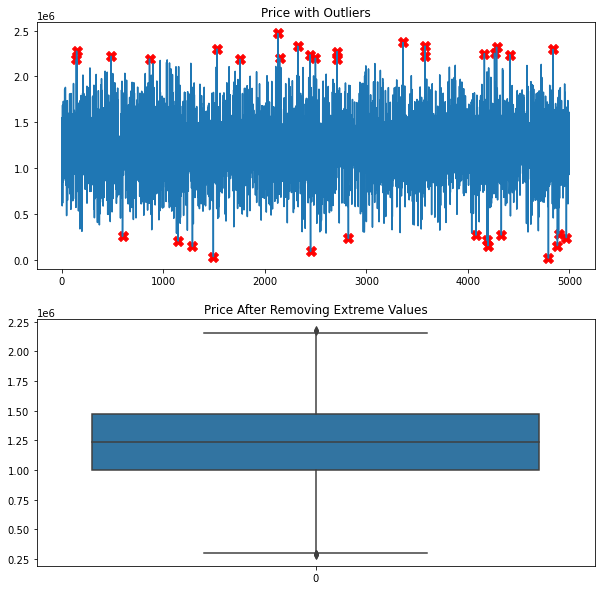

In [ ]:
check_outliers(data, columns[5])

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
clean_data = data.copy()

## **Winsorization**:

A new dataset that is comparable to the original dataset but with less extreme values in place of the extreme values is the outcome of the Winsorization process. This can make the data more suitable for use in predictive modelling by reducing the impact of outliers on statistical analysis and modelling.

In [ ]:
def apply_winsorize(data, columns):
    winsorize(data[columns], limits = [0.005, 0.005], inplace = True)

In [ ]:
#performing winsorization using scipy to remove the effect of extreme values

for i, j in data.items():
    apply_winsorize(clean_data, i)

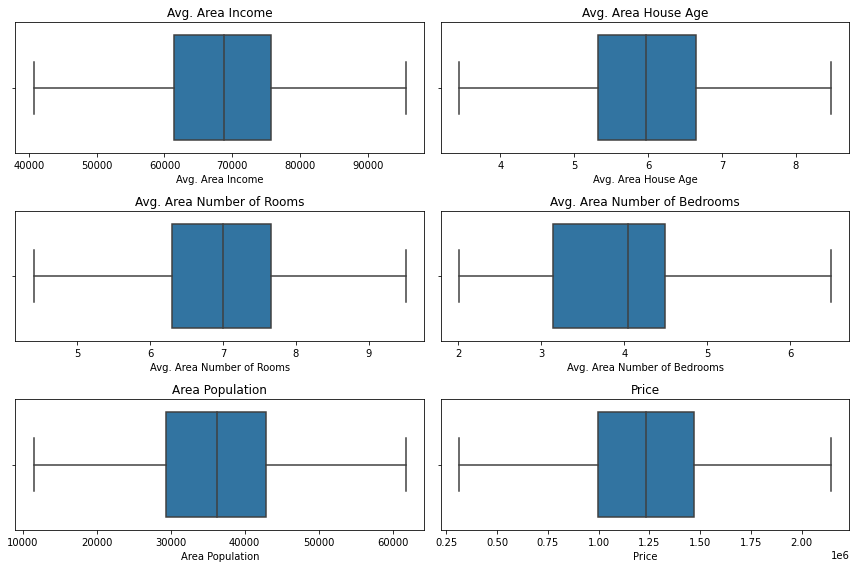

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(12,8))
axis = [axes_row for axes in ax for axes_row in axes]

for i, j in enumerate(data.columns):
    graph = sns.boxplot(x = clean_data[j], ax = axis[i])
    graph.set_title(j)
    plt.tight_layout()

### **Feature and traget**

In [ ]:
X = clean_data.iloc[:, :-1]
y = clean_data.iloc[:, -1]

In [ ]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,85658.329275,6.569036,5.567667,2.04,35204.975697
1,50502.094188,7.407850,6.666403,3.17,37593.862491
2,65051.216268,4.357995,6.077607,2.30,25191.407386
3,60904.450730,4.035777,6.476942,2.45,33078.149960
4,69380.011305,5.719610,8.022283,5.18,28115.603163


In [ ]:
y.head()

0    1545961.61
1    1286477.40
2     612211.59
3     586381.55
4    1086186.43
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

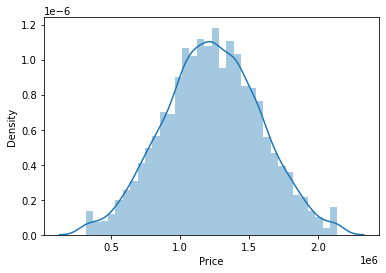

In [ ]:
sns.distplot(y)

<Axes: >

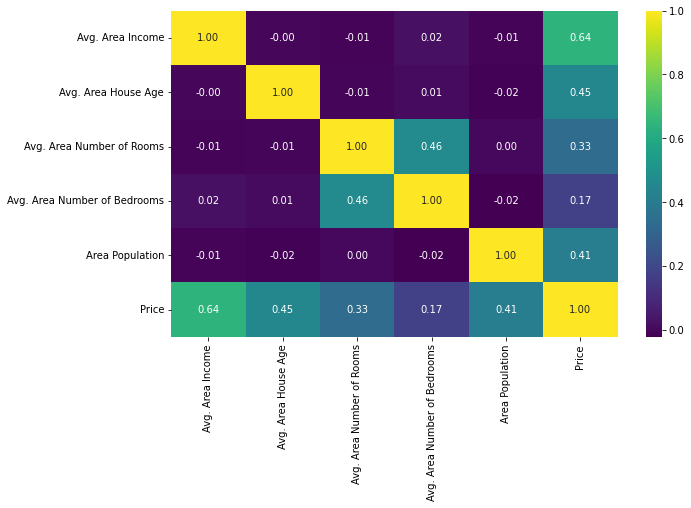

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(clean_data.corr(), annot = True, fmt = '.2f', cmap = 'viridis')

### **Train the model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 5)
(1500, 5)
(3500,)
(1500,)


## **Sklearn Pipeline**:

It enables you to combine several workflow phases into a single object, including preprocessing, feature selection, and model training. After a pipeline has been established, you can use it to train and test your model in a more effective and repeatable manner.

In [ ]:
LR = Pipeline([("scaler", StandardScaler()), ("linear_regression", LinearRegression())])
DTC = Pipeline([("scaler", StandardScaler()), ("decisiontree_regression", DecisionTreeRegressor(random_state = 42))])
RFC = Pipeline([("scaler", StandardScaler()), ("randomforest_regression", RandomForestRegressor(random_state = 42))])

In [ ]:
scores_data = pd.DataFrame(columns = ["Model", "CVScores"])

In [ ]:
pipelines = [LR, DTC, RFC]

In [ ]:
pipe_dict = {0: "Linear Regression", 1: "RandomForest", 2: "Decision Tree"}

## Cross Validation:

In this example, we first split the USA housing dataset into features (X) and target (y).Using all regressor and use cross_val_score() to perform 5-fold cross-validation, which means that the data will be split into 5 folds and the model will be trained and evaluated 5 times. The cv parameter specifies the number of folds to use.


The cross-validation scores for each fold, as well as the average score and standard deviation over all folds, will be displayed in the code's output. This can help us gauge the model's effectiveness and how consistent it is across various data subsets.


In [ ]:
for i, pipe in enumerate(pipelines):
    score = cross_val_score(pipe, X, y, cv = 5)
    print(pipe_dict[i], ": ", score.mean())

Linear Regression :  0.9149711539289589
RandomForest :  0.7515089175273526
Decision Tree :  0.8849099167767763


In [ ]:
'''pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", LinearRegression())])'''

'pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", LinearRegression())])'

## **GridSearchCV:**

By searching through a wide range of possible parameter values and choosing the combination of values that offers the best performance, the GridSearchCV technique is used to determine the ideal hyperparameters for a machine learning model.


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# Creating a dictionary of parameters to use in GridSearchCV
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion':  ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth':  [None, 2, 4, 6, 8, 10, 12, 14],
    'max_features': [None, 'auto', 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

dtree = GridSearchCV(
    estimator=DecisionTreeRegressor(max_depth=6, criterion='friedman_mse', max_features=None, splitter='best', random_state=0),
    param_grid=grid_params,
    cv=5,
    n_jobs=5,
    verbose=1,
)




In [ ]:
best_model = dtree.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


In [ ]:
best_model.best_params_

{'criterion': 'poisson',
 'max_depth': 10,
 'max_features': 0.8,
 'splitter': 'best'}

In [ ]:
model = RFC.fit(X_train, y_train)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
actual_price = (y_test - prediction)


## **Prediction Diagnosis**:

The purpose of the function is to help us identify whether the model is making accurate predictions or whether there are issues with the model that need to be addressed.

For example, we might need to use a more complicated model or add more features to the model if the residual plot clearly demonstrates a trend. We may need to use a different statistical model or convert the data in some other way if the quantile plot reveals that the residuals are not normally distributed.

In [ ]:
def print_evaluate(true, prediction):
    mae = mean_absolute_error(true, prediction)
    mse = mean_squared_error(true, prediction)
    rmse = np.sqrt(mean_squared_error(true, prediction))
    r2_square = r2_score(true, prediction)

    print("MAE: {}".format(mae))
    print("MSE: {}".format(mse))
    print("RMSE: {}".format(rmse))
    print("R2 Square: {}".format(r2_square))

In [ ]:
def plot_diag(true, prediction):

    #residuals
    actual_price = (true-prediction)

    #plotting the distplot
    plt.figure(figsize=(14,8))
    plt.subplot(221)
    plt.title("Distplot")
    sns.distplot(actual_price)

    plt.subplot(222)
    plt.title("Residual Plot")
    sns.scatterplot(x=prediction, y=actual_price)
    sns.lineplot(x=[min(prediction), max(prediction)], y=[0, 0], linestyle='--', color='r')



    #plotting the quantile plot
    ax = plt.subplot(223)
    plt.title("Quantile Plot")
    sm.qqplot(actual_price, line = 'r', ax = ax)

    #plotting the autocorrelation plot
    ax2 = plt.subplot(224)
    plt.title("Autocorrelation Plot")
    plot_acf(actual_price, ax = ax2)
    plt.tight_layout()

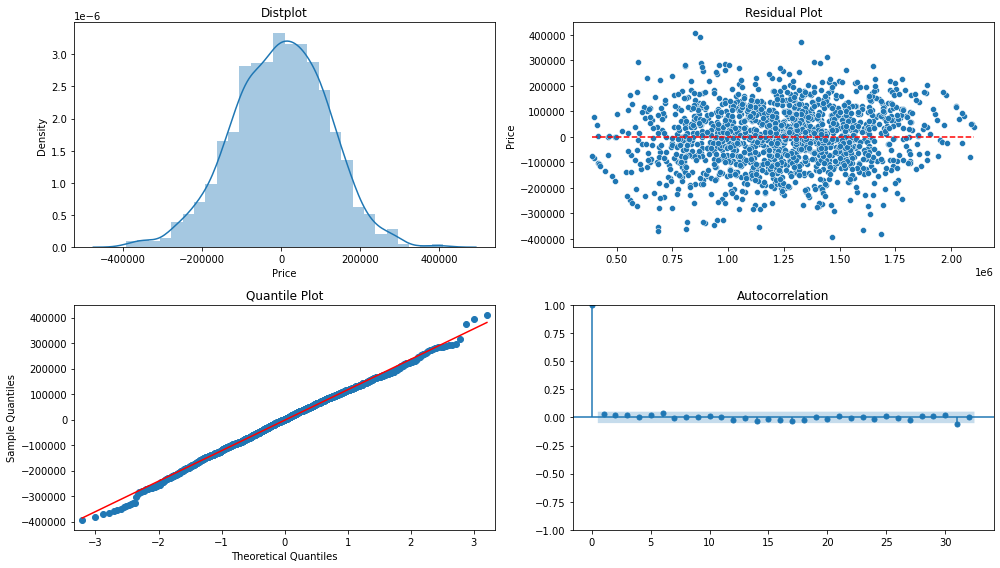

In [ ]:
plot_diag(y_test, prediction)

<Axes: xlabel='Price'>

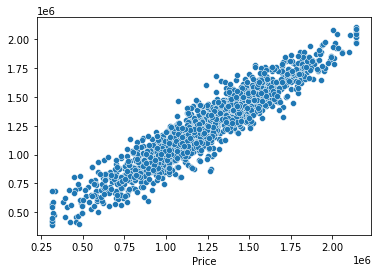

In [ ]:
sns.scatterplot(x=y_test, y=prediction)


In [ ]:
print_evaluate(y_test, prediction)

MAE: 95119.59981186666
MSE: 14193174567.62675
RMSE: 119135.11055783156
R2 Square: 0.889206774147351


In [ ]:
X_test["Predicted Price"] = prediction

In [ ]:
X_test["Original Price"] = y_test

In [ ]:
X_test["Predicted Price"] = remove_decimal(X_test["Predicted Price"])

### **Original Price vs Predicted Price**

In [ ]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Predicted Price,Original Price
1501,73056.526114,5.571478,6.086302,4.21,45565.900564,775824.21,1183272.51
2586,58276.581191,4.363524,5.847511,4.01,31457.042849,1340397.82,502553.05
2653,65081.584048,5.433570,9.212518,5.14,37594.493458,1796276.75,1343824.22
1055,57688.274139,6.270999,6.604815,3.34,19900.000046,1187452.19,684257.11
705,68974.102870,7.820095,6.807938,3.13,31832.992620,1281816.39,1702526.06
...,...,...,...,...,...,...,...
3563,64714.524162,5.153745,5.490632,4.45,23836.538434,1008148.04,730043.65
1538,68613.009334,6.979610,7.415320,3.49,31936.442354,783913.44,1373022.24
1837,76613.080076,7.393603,7.346704,5.50,43250.989967,1721171.66,1718876.79
2380,76926.144777,5.977250,5.751756,3.23,45836.016865,1507470.58,1353635.41
